In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report



# 1 EDA

### 1.1 Informations globales du dataset

In [142]:
# Import du dataset
data = pd.read_csv("RT_IOT2022", index_col=0)

In [143]:
# Visualisation des premières instances du dataset
print(data.shape)
data.head()

(123117, 84)


,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,0.281148,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,MQTT_Publish
1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,0.282277,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,MQTT_Publish
2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,0.280164,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,MQTT_Publish
3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,0.281593,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,MQTT_Publish
4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,0.282111,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240,26847,502,MQTT_Publish


In [144]:
# Visualisation des types des features, de la présence de valeurs nulles
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123117 entries, 0 to 2009
Data columns (total 84 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id.orig_p                 123117 non-null  int64  
 1   id.resp_p                 123117 non-null  int64  
 2   proto                     123117 non-null  object 
 3   service                   123117 non-null  object 
 4   flow_duration             123117 non-null  float64
 5   fwd_pkts_tot              123117 non-null  int64  
 6   bwd_pkts_tot              123117 non-null  int64  
 7   fwd_data_pkts_tot         123117 non-null  int64  
 8   bwd_data_pkts_tot         123117 non-null  int64  
 9   fwd_pkts_per_sec          123117 non-null  float64
 10  bwd_pkts_per_sec          123117 non-null  float64
 11  flow_pkts_per_sec         123117 non-null  float64
 12  down_up_ratio             123117 non-null  float64
 13  fwd_header_size_tot       123117 non-null  int64  


### 1.2 Variable target

Attack_type
DOS_SYN_Hping                 94659
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: count, dtype: int64


<Axes: >

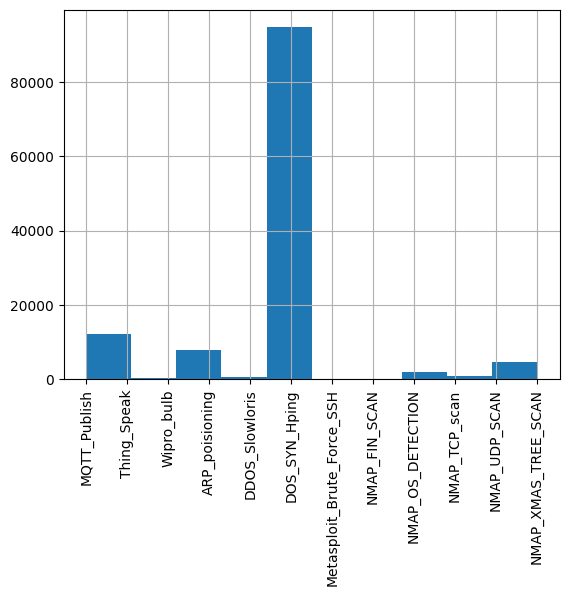

In [145]:
# Visualisation de la variable target : Attack_type
print(data['Attack_type'].value_counts())
data["Attack_type"].hist(xrot=90)
# plt.savefig('attack_type_hist.png', bbox_inches='tight')

### 1.3 Attributs non numériques

In [146]:
# Visualisation des valeurs uniques des features non numériques
object_features = data.select_dtypes(include=['object']).columns
print(f"Valeurs uniques pour les features : {object_features}")
for feature in object_features:
    print(feature)
    unique_values = data[feature].unique()
    for value in unique_values:
        print(f"\t {value}")

Valeurs uniques pour les features : Index(['proto', 'service', 'Attack_type'], dtype='object')
proto
	 tcp
	 udp
	 icmp
service
	 mqtt
	 -
	 http
	 dns
	 ntp
	 ssl
	 dhcp
	 irc
	 ssh
	 radius
Attack_type
	 MQTT_Publish
	 Thing_Speak
	 Wipro_bulb
	 ARP_poisioning
	 DDOS_Slowloris
	 DOS_SYN_Hping
	 Metasploit_Brute_Force_SSH
	 NMAP_FIN_SCAN
	 NMAP_OS_DETECTION
	 NMAP_TCP_scan
	 NMAP_UDP_SCAN
	 NMAP_XMAS_TREE_SCAN


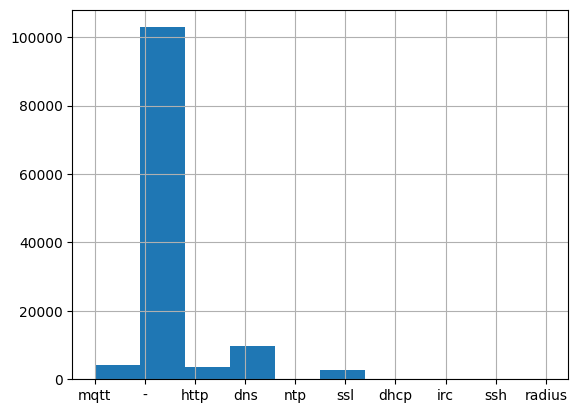

In [147]:
# Visualisation de l'histogramme de l'attribut 'service' 
data['service'].hist()
plt.savefig('service_hist.png', bbox_inches='tight')

<Axes: >

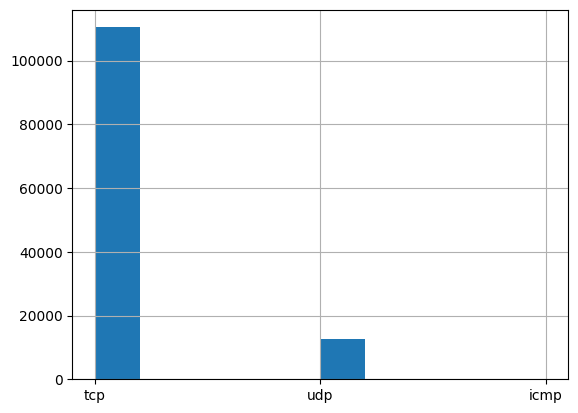

In [148]:
# Visualisation de l'histogramme de l'attribut 'proto' 
data['proto'].hist()
# plt.savefig('proto_hist.png', bbox_inches='tight')

### 1.4 Attributs numériques

In [149]:
# Description des attributs numériques
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id.orig_p,123117.0,3.463926e+04,1.907062e+04,0.0,17702.000000,37221.000000,50971.000000,6.553500e+04
id.resp_p,123117.0,1.014305e+03,5.256372e+03,0.0,21.000000,21.000000,21.000000,6.538900e+04
flow_duration,123117.0,3.809566e+00,1.300054e+02,0.0,0.000001,0.000004,0.000005,2.172834e+04
fwd_pkts_tot,123117.0,2.268826e+00,2.233656e+01,0.0,1.000000,1.000000,1.000000,4.345000e+03
bwd_pkts_tot,123117.0,1.909509e+00,3.301831e+01,0.0,1.000000,1.000000,1.000000,1.011200e+04
...,...,...,...,...,...,...,...,...
idle.avg,123117.0,1.664985e+06,9.007064e+06,0.0,0.000000,0.000000,0.000000,3.000000e+08
idle.std,123117.0,4.550183e+04,1.091361e+06,0.0,0.000000,0.000000,0.000000,1.208029e+08
fwd_init_window_size,123117.0,6.118905e+03,1.871631e+04,0.0,64.000000,64.000000,64.000000,6.553500e+04
bwd_init_window_size,123117.0,2.739776e+03,1.001885e+04,0.0,0.000000,0.000000,0.000000,6.553500e+04


In [150]:
# Calcul des corrélations entre les attributs
data_corr = data.select_dtypes([float, int]).corr()

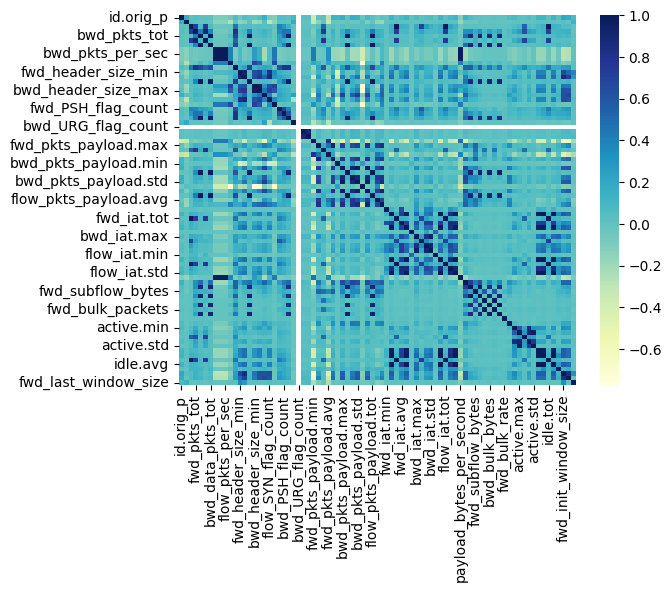

In [ ]:
# Visualisation des corrélations entre les attributs
sns.heatmap(data_corr,cmap="YlGnBu",annot=False)
# plt.savefig('correlation_matrix.png', bbox_inches='tight')

In [152]:
# Vérification de la distribution des valeurs de la variable bwd_URG_flag_count
print(data['bwd_URG_flag_count'].value_counts())

bwd_URG_flag_count
0    123117
Name: count, dtype: int64


## 2 Pré-traitement

### 2.1 Valeurs manquantes et encoding

In [153]:
# Remplacement de la valeur "-" pour la feature service
data.loc[data["service"] ==  "-", "service"] = "unknown"

In [154]:
# Encoder les features proto et service
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
cat_cols = ['proto', 'service']
ohe_arr = ohe.fit_transform(data[cat_cols])
ohe_cols = ohe.get_feature_names_out(cat_cols)
ohe_df = pd.DataFrame(ohe_arr, columns=ohe_cols, index=data.index).astype(int)
data = pd.concat([data.drop(columns=cat_cols), ohe_df], axis=1)

### 2.2 Sélection des données

In [155]:
# Division du jeu de données en ensembles d'entraînement et de test
X = data.drop('Attack_type',axis=1)
y = data['Attack_type']

In [ ]:
# Suppression des attributs bwd_URG_flag_count, id_orig.p et id_resp.p
X.drop(columns=['bwd_URG_flag_count', 'id.orig_p', 'id.resp_p'], axis=1, inplace=True)

In [158]:
# Suppression des attributs fortement corrélés
# Seuil de corrélation fixé à 0.9
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype('bool'))
to_drop = []
for col in upper.columns:
    if any((upper[col] > 0.9)) :
        to_drop.append(col)

X = X.drop(to_drop, axis=1)


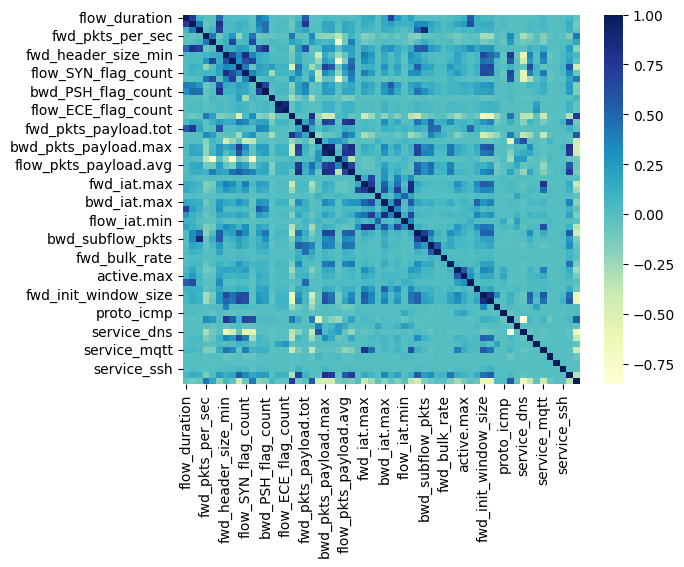

In [164]:
# Visualisation de la nouvelle matrice de corrélation
new_corr_matrix = X.corr()
sns.heatmap(new_corr_matrix, cmap="YlGnBu")
plt.savefig('correlation_matrix_feature_selection.png', bbox_inches='tight')

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=21)

print("Taille du jeu de données : ", X.shape)
print(f"Taille du jeu de données d'entraînement : {X_train.shape}")
print("Taille du jeu de données de test : ", X_test.shape)

Taille du jeu de données :  (123117, 60)
Taille du jeu de données d'entraînement : (86181, 60)
Taille du jeu de données de test :  (36936, 60)


In [ ]:
# Les outliers ont été conservés car ils représentent des comportements anormaux potentiellement informatifs. Un RobustScaler a été utilisé afin de limiter leur impact sans altérer leur signification.


# Détection des outliers
def count_outliers_tukey(feature):
    Q1 = feature.quantile(0.25)
    Q3 = feature.quantile(0.75)
    IQR = Q3 - Q1
    floor = Q1 - 1.5 * IQR
    ceiling = Q3 + 1.5 * IQR
    outliers = feature[(feature < floor) | (feature > ceiling)]
    return outliers.count() / feature.count()

outliers_per_feature_tukey = {}
for feature in X.columns:
        outlier_fraction = count_outliers_tukey(X[feature])
        outliers_per_feature_tukey[feature] = outlier_fraction
        outliers_per_feature_tukey = pd.Series(outliers_per_feature_tukey)
print(outliers_per_feature_tukey)

flow_duration            0.155714
fwd_pkts_tot             0.143457
bwd_pkts_tot             0.262872
fwd_pkts_per_sec         0.000000
down_up_ratio            0.209524
fwd_header_size_tot      0.198364
fwd_header_size_min      0.182079
bwd_header_size_min      0.260443
flow_FIN_flag_count      0.065499
flow_SYN_flag_count      0.222244
flow_RST_flag_count      0.226597
fwd_PSH_flag_count       0.101570
bwd_PSH_flag_count       0.080882
fwd_URG_flag_count       0.016293
flow_CWR_flag_count      0.000577
flow_ECE_flag_count      0.000585
fwd_pkts_payload.min     0.231146
fwd_pkts_payload.max     0.231146
fwd_pkts_payload.tot     0.231113
fwd_pkts_payload.avg     0.231146
bwd_pkts_payload.min     0.061429
bwd_pkts_payload.max     0.142304
bwd_pkts_payload.avg     0.142304
flow_pkts_payload.min    0.169538
flow_pkts_payload.avg    0.309592
flow_pkts_payload.std    0.047889
fwd_iat.min              0.143100
fwd_iat.max              0.143100
fwd_iat.avg              0.143100
bwd_iat.min   

In [161]:
# Remise à l'échelle des attributs
scaler = RobustScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 2.3 Sélection des attributs

In [162]:
# Sélection des 20 meilleurs attributs selon SelectKBest
select_k_best = SelectKBest(k=20)
select_k_best = select_k_best.fit(X_train, y_train)
selected_features_kbest = X.columns[select_k_best.get_support()]
X_train_kbest = X_train[selected_features_kbest]
X_test_kbest = X_test[selected_features_kbest]
print("Features sélectionnées par SelectKBest:")
print(selected_features_kbest)

Features sélectionnées par SelectKBest:
Index(['fwd_header_size_min', 'flow_FIN_flag_count', 'flow_SYN_flag_count',
       'flow_RST_flag_count', 'fwd_URG_flag_count', 'fwd_pkts_payload.min',
       'fwd_pkts_payload.avg', 'bwd_pkts_payload.max', 'bwd_pkts_payload.avg',
       'fwd_iat.max', 'flow_iat.avg', 'fwd_init_window_size',
       'bwd_init_window_size', 'fwd_last_window_size', 'proto_tcp',
       'service_dns', 'service_http', 'service_mqtt', 'service_ssh',
       'service_unknown'],
      dtype='object')


In [163]:
# Sélection des meilleurs attributs selon RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)
X_rfe = rfe.fit_transform(X_train_scaled, y_train)
selected_features_rfe = X.columns[rfe.get_support()]
X_train_rfe = X_train[selected_features_rfe]
X_test_rfe = X_test[selected_features_rfe]
print("Features sélectionnées par RFE :")
print(selected_features_rfe)


Features sélectionnées par RFE :
Index(['fwd_pkts_per_sec', 'fwd_header_size_tot', 'fwd_URG_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'bwd_pkts_payload.max', 'flow_pkts_payload.min',
       'flow_pkts_payload.std', 'fwd_iat.min', 'flow_iat.min', 'flow_iat.avg',
       'active.min', 'active.max', 'bwd_init_window_size',
       'fwd_last_window_size', 'proto_icmp', 'service_http', 'service_mqtt',
       'service_unknown'],
      dtype='object')


## 3 Modèle

In [ ]:
models={
    'NB': GaussianNB(),
    'LR': LogisticRegression(max_iter=500),
    'DT': DecisionTreeClassifier(random_state=1),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'LDA': LinearDiscriminantAnalysis()
}

models_metric={}
for model_name in models:
    model=models[model_name]
    model.fit(X_train_kbest, y_train)
    yhat=model.predict(X_test_kbest)
    models_metric[model_name]=[round(accuracy_score(y_test,yhat),3),round(f1_score(y_test,yhat, average='macro'),3),round(roc_auc_score(y_test,yhat),3)]
print(models_metric)



ValueError: dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.